# Introduction à la programmation Python

Julien Velcin, laboratoire ERIC, Université Lyon 2

Formation doctorale de l'UdL (2022-2023)

## Première partie : (quelques) fonctionnalités élémentaires de Python

Affectez les valeurs 2 et 18.2 aux variables *x* et *y*, puis faites-en le produit

In [156]:
x = 2
y = 18.2
x*y

36.4

Ecrivez une fonction *prod(x,y)* qui, à partir de deux valeurs, retourne leur produit.

In [157]:
def prod(x, y):
    return x*y

Testez votre fonction.

In [158]:
prod(2,3)

6

Ecrivez une fonction *prod_add(x,y)* qui, à partir de deux valeurs, retourne à la fois leur produit et leur somme dans un *tuple* (càd une liste de deux valeurs) 

In [159]:
def prod_add(x,y):
    s = x+y
    p = x*y
    return p,s

Puis testez-là.

In [160]:
produit, somme = prod_add(2,12)
print(f"Le produit est {produit} et la somme est {somme}")

Le produit est 24 et la somme est 14


Utilisez votre fonction pour afficher, à l'aide d'une boucle, le résultat pour les couples de valeur x dans {0..10} et y = x+2 (c'est-à-dire : (0,2), (1, 3), etc.). Vous utiliserez la fonction *range*.

In [161]:
for x in range(11):
    y = x + 2
    #print(f"({x},{y})")
    #print("(" + str(x) + "," + str(y) + ")")
    print("({},{})".format(x,y))

(0,2)
(1,3)
(2,4)
(3,5)
(4,6)
(5,7)
(6,8)
(7,9)
(8,10)
(9,11)
(10,12)


Exécutez les mêmes instructions mais, cette fois, enregistrez les tuples résultants à l'intérieur d'une liste que vous appelerez *coll*.

In [162]:
coll = []
for x in range(11):
    y = x + 2    
    #coll = coll + [(x,y)]
    coll.append((x,y))
print(coll)

[(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12)]


Parcourez la collection à l'aide d'une boucle *for* et affichez chaque élément de la manière suivante grâce à la fonction *print* :

Pour x=0 et y=2, x+y=2 et x\*y=0

Pour x=1 et y=3, x+y=4 et x\*y=3

...

In [163]:
# Solution avec une "compréhension de liste" :
coll = [(x, x+2) for x in range(11)]

In [164]:
#for e in coll:
for x,y in coll:
    #(x,y) = e
    (p,s) = prod_add(x,y)
    print(f"Pour x={x} et y={y}, x+y={s} et x*y={p}")

Pour x=0 et y=2, x+y=2 et x*y=0
Pour x=1 et y=3, x+y=4 et x*y=3
Pour x=2 et y=4, x+y=6 et x*y=8
Pour x=3 et y=5, x+y=8 et x*y=15
Pour x=4 et y=6, x+y=10 et x*y=24
Pour x=5 et y=7, x+y=12 et x*y=35
Pour x=6 et y=8, x+y=14 et x*y=48
Pour x=7 et y=9, x+y=16 et x*y=63
Pour x=8 et y=10, x+y=18 et x*y=80
Pour x=9 et y=11, x+y=20 et x*y=99
Pour x=10 et y=12, x+y=22 et x*y=120


Construisez une variable dictionnaire, nommée *dico*, qui utilise la collection *coll* afin d'attribuer la valeur *y* à la clef *x* pour chaque couple *(x,y)* contenu dans la collection. Par exemple, on souhaite obtenir :

dico = { 0: 2,
  3: 4,
  ...
}

In [165]:
dico = {}
for x,y in coll:
    dico[x] = y

Affichez le contenu de quelques valeurs du dictionnaire, puis la liste des valeurs (via *values()*) et des clefs (via *keys()*), afin de vérifier que tout s'est bien passé.

In [166]:
print(f"Valeur pour la clef 7, ie dico[7] : {dico[7]}")
print(f"Valeur pour la clef 3, ie dico[3] : {dico[3]}")
print(f"Liste des valeurs : {dico.values()}")
print(f"Liste des clefs : {dico.keys()}")

Valeur pour la clef 7, ie dico[7] : 9
Valeur pour la clef 3, ie dico[3] : 5
Liste des valeurs : dict_values([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
Liste des clefs : dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


## Deuxième partie : lecture d'un fichier de données et premières manipulations avec Pandas

Commençons par essayer de charger en mémoire un jeu de données issues du site des données ouvertes par le Grand Lyon sur les randonnées recensées dans la région.

Les données se trouve dans un fichier en ligne (ici : https://data.grandlyon.com/jeux-de-donnees/boucles-randonnee-metropole-lyon/donnees) mais vous pouvez aussi les télécharger directement depuis [ce lien](https://velcin.github.io/files/python/datasets/evg_esp_veg.envpdiprboucle.json). L'important est de sauvegarder ce fichier sur votre machine, près de votre notebook.

Pour charger le jeu de données avec Python, utilisez la fonction *load* de la librairie *json* sur le fichier que vous devez ouvrir en lecture avec la fonction *open*. Enregistrez le résultat dans la variable *d_json*.

N'hésitez pas à vous aider du site suivant :

https://www.programiz.com/python-programming/json

In [167]:
import json

# si le fichier se trouve directement à côté du notebook :
filename = "datasets/evg_esp_veg.envpdiprboucle.json"
# si le fichier se trouve dans le répertoire "datasets“ :
#filename = "datasets/evg_esp_veg.envpdiprboucle.json"

with open(filename, 'r') as f:
     d_json = json.load(f)

La variable que vous venez de charger est un dictionnaire, vous pouvez le vérifier avec la commande *type*. Observez les clefs (fonction *keys()*) et essayez d'avoir accès aux champs du jeu de données et à la liste des randonnées.

In [168]:
print(f"Type de l'objet : {type(d_json)}")
print(f"Voilà les clefs : {d_json.keys()}")

Type de l'objet : <class 'dict'>
Voilà les clefs : dict_keys(['fields', 'values', 'nb_results', 'table_href', 'layer_name'])


Enregistrez la liste des champs dans une variable *var* et les randonnées dans une variable *rando*. Vérifiez le nombre d'enregistrements et essayez d'avoir accès aux valeurs.

In [169]:
var = d_json["fields"]
rando = d_json["values"]
rando[0]
#rando[0]["descriptif"]

{'ydepart': 45.83256712,
 'nom': 'Fort de Vancia',
 'descriptif': "Traversez le vallon duRavinet rejoingnez le fort de Vancia. Achevé en 1878, ce fort faisait parti d'une ceintuire de 14 bastions dextinés à protéger Lyon des attaques prussiennes.",
 'depart': 'Sathonay-Village-Le Bourg',
 'cheminement_retour': None,
 'difficulte': 'moyen',
 'cheminement_aller': "l'Eglise > la Villotière > le Ravin > Paul Chevallier > Parc Brosset > Semailles > Eglise de Vancia > Château Bérard > Fort de Vancia > Fort de Vancia > les Epalloux > la Villotière > l'Eglise > Le Bourg",
 'longueur': '11,4 km',
 'temps_parcours': '185 min',
 'commune_depart': 'Sathonay-Village',
 'code_insee': '69293',
 'denivele': '66 m',
 'gid': 1,
 'vocation': None,
 'identifiant': 357,
 'xdepart': 4.87895226,
 'observation': None}

Quelle est la taille du jeu de données, càd le nombre de lignes ? Quel est le nom de la randonnée de la ligne 10 ?

In [170]:
print(f"La taille du jeu de donénes est {len(rando)}")
nom = rando[10]["nom"]
print(f"Le nom de la rando 10 est : {nom}")

La taille du jeu de donénes est 61
Le nom de la rando 10 est : Le Bois des Côtes


Pour rendre ces données pleinement utilisables, nous allons convertir le fichier *json* en format tabulaire avec la librairie *pandas*. Il vous suffit de créer un DataFrame à partir de la variable *rando* à l'aide de la fonction *DataFrame.from_dict*

In [171]:
import pandas as pd

df_rando = pd.DataFrame.from_dict(rando)

Vous pouvez vérifier les dimensions de votre tableau à l'aide de l'attribut *shape* de l'object que vous venez de créer.

In [172]:
df_rando.shape

(61, 17)

*df.head()* et *df.tail()* permettent d'avoir un aperçu (respectivement) du début et la fin de l'objet DataFrame. Essayez ces commandes.

In [173]:
df_rando.head()
#df_rando.tail()

,ydepart,nom,descriptif,depart,cheminement_retour,difficulte,cheminement_aller,longueur,temps_parcours,commune_depart,code_insee,denivele,gid,vocation,identifiant,xdepart,observation
0,45.832567,Fort de Vancia,Traversez le vallon duRavinet rejoingnez le fo...,Sathonay-Village-Le Bourg,None,moyen,l'Eglise > la Villotière > le Ravin > Paul Che...,"11,4 km",185 min,Sathonay-Village,69293,66 m,1,None,357,4.878952,None
1,45.806121,Boucle du Bois de la Lune,C'est un parcours à l'ombre bien appréciable p...,Parking du Lac,None,moyen,Le Lac > L'Hippodrome > Bois de la Lune > Les ...,"9,7 km",150 min,La Tour-de-Salvagny,69250,94 m,2,pédestre-équestre,492,4.720176,None
2,45.784920,À la découverte du Parc de Lacroix-Laval,None,Belle Etoile,None,facile,Les Cinq Vallons > Les Varennes > Barilly > Cl...,5 km,140 min,Marcy-l'Étoile,69127,28 m,3,pédestre,500,4.717710,None
3,45.774629,Ruisseau des Planches,Cette promenade parcours les vallons boisés de...,Écully - Village,None,difficile,Le Calabert > Chemin des Rivières > Fontville ...,"11,1 km",170 min,Écully,69081,167 m,4,pédestre-VTT,510,4.778837,None
4,45.810110,Tour de Saint-Didier,"En partant du bourg, on rejoint par le chemin ...",Le Bourg,None,difficile,Les Barres > Les Primevères > En Arche > Senti...,"11,2 km",180 min,Saint-Didier-au-Mont-d'Or,69194,332 m,30,None,609,4.798420,None


Les commandes *loc* et *iloc* permettent d'accéder facilement à une partie du tableau, par exemple :

*df.iloc[:, 1:4]* signifie qu'on veut accéder à toutes les lignes (*:*) et aux colonnes 1 à 4 (*1:4*). Avec *loc*, il est possible d'accéder aux colonnes via leur nom tandis que *iloc* fonctionne uniquement avec des index entiers.

Testez cette fonctionnalité.

In [174]:
#df_rando.iloc[0:2, 1:3]
df_rando.loc[0:2, "depart"]

0    Sathonay-Village-Le Bourg
1               Parking du Lac
2                 Belle Etoile
Name: depart, dtype: object

Accéder aux données d'une colonne devient aisée puisqu'il suffit de mentionner le nom de la variable, avant d'y appliquer différents traitements (ex. calculer une moyenne, un max, etc.) :

df["nom de la colonne"]

auquel on applique les commandes *mean()*, *max()*...

Pour tester cela, utilisez la commande *value_counts()* qui calcule la distribution des valeurs pour une variable catégorielle. Vous testerez avec la variable *difficulte* de la randonnée.

In [175]:
df_rando["difficulte"].value_counts()

moyen        26
facile       24
difficile    10
Name: difficulte, dtype: int64

Pour manipuler certaines données, il peut être nécessaire de faire des traitements préalables. Par exemple, il est nécessaire pour la variable *temps_parcours* de retirer la fin de la chaîne de caractère (en l'occurrence les 4 derniers caractères " min").

Commencez par visualiser la colonne correspondante.

In [176]:
tp = df_rando["temps_parcours"]
print(tp)

0     185 min
1     150 min
2     140 min
3     170 min
4     180 min
       ...   
56     60 min
57     60 min
58     45 min
59     90 min
60     45 min
Name: temps_parcours, Length: 61, dtype: object


Construisez une nouvelle série en transformant ces valeurs en nombres entiers correspondants, débarassés de l'unité de mesure. Une solution élégante consiste à utilisation une liste "compréhensible" (*list comprehension*) mais vous pouvez construire une solution plus simple avec une boucle.

In [177]:
#int(tp[0][0:3]) # garder les 3 premiers caractères
#int(tp[0][:-4]) # retirer les 4 derniers caractères
# int() permet de convertir la chaîne de caractères en entier pour les calculs qui suivent

nouvelles_valeurs = []
for v in tp:
    nouvelles_valeurs.append(int(v[:-4]))    
    
# avec une liste compréhensive :
#nouvelles_valeurs = [int(v[:-4]) for v in tp]

#print(nouvelles_valeurs)

df_rando["temps_parcours"] = nouvelles_valeurs

In [178]:
df_rando.head()

,ydepart,nom,descriptif,depart,cheminement_retour,difficulte,cheminement_aller,longueur,temps_parcours,commune_depart,code_insee,denivele,gid,vocation,identifiant,xdepart,observation
0,45.832567,Fort de Vancia,Traversez le vallon duRavinet rejoingnez le fo...,Sathonay-Village-Le Bourg,None,moyen,l'Eglise > la Villotière > le Ravin > Paul Che...,"11,4 km",185,Sathonay-Village,69293,66 m,1,None,357,4.878952,None
1,45.806121,Boucle du Bois de la Lune,C'est un parcours à l'ombre bien appréciable p...,Parking du Lac,None,moyen,Le Lac > L'Hippodrome > Bois de la Lune > Les ...,"9,7 km",150,La Tour-de-Salvagny,69250,94 m,2,pédestre-équestre,492,4.720176,None
2,45.784920,À la découverte du Parc de Lacroix-Laval,None,Belle Etoile,None,facile,Les Cinq Vallons > Les Varennes > Barilly > Cl...,5 km,140,Marcy-l'Étoile,69127,28 m,3,pédestre,500,4.717710,None
3,45.774629,Ruisseau des Planches,Cette promenade parcours les vallons boisés de...,Écully - Village,None,difficile,Le Calabert > Chemin des Rivières > Fontville ...,"11,1 km",170,Écully,69081,167 m,4,pédestre-VTT,510,4.778837,None
4,45.810110,Tour de Saint-Didier,"En partant du bourg, on rejoint par le chemin ...",Le Bourg,None,difficile,Les Barres > Les Primevères > En Arche > Senti...,"11,2 km",180,Saint-Didier-au-Mont-d'Or,69194,332 m,30,None,609,4.798420,None


A présent que la variable a bien été convertie en numérique, vous pouvez appliquer les opérateurs classiques comme la moyenne (fonction *mean()*).

En pandas, cela donne pour une série s :

s.mean()

In [179]:
print("Le temps de parcours moyen est {:.2f} minutes.".format(df_rando["temps_parcours"].mean()))

Le temps de parcours moyen est 111.56 minutes.


La librairie *pandas* permet des traitements plus avancés, inspirés des bases de données. Il est ainsi possible de regrouper les lignes en fonction des valeurs d'une colonne (opération *group by*) puis réaliser des opérations statistiques.

Essayez de calculer le temps de parcours moyen pour les randonnées de chaque niveau de difficulté.

Vous pouvez aller voir sur le site :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [181]:
dif_moyennes = df_rando.groupby("difficulte")
# numeric_only permet de ne faire la moyenne que sur les colonnes où c'est possible
dif_moyennes[["difficulte", "temps_parcours"]].mean(numeric_only=True)

,temps_parcours
difficulte,
difficile,136.000000
facile,78.958333
moyen,135.769231


Charger des données depuis un fichier *csv* ou *xlsx* est également très facile. Nous verrons un exemple plus loin.

## Troisième partie : visualisation avec Matplotlib

In [102]:
import matplotlib

%matplotlib inline

Pour commencer, on peut vouloir afficher un diagramme en barre sur le contenu d'une série, par exemple la distribution selon une certaine variable. Pour cela, il suffit d'invoquer la fonction *plot.bar()* à partir d'une série *pandas*, c'est-à-dire :

ma_série.plot.bar()

Pour commencer, afficher le diagramme correspondant au nombre de randonnées pour chaque niveau de difficulté (facile, moyen difficile).

<AxesSubplot: >

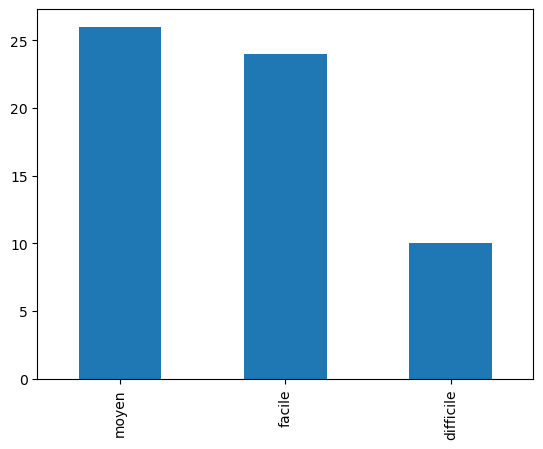

In [112]:
df_rando["difficulte"].value_counts().plot.bar()

On peut vouloir ordonner en fonction de l'ordre alphabétique des index (ici, les noms des catégories). Dans ce cas, il faut utiliser la fonction *sort_index()* sur la série comportant les données à afficher.

Affichez à nouveau le diagramme en barres mais avec un tri sur les index.

<AxesSubplot: >

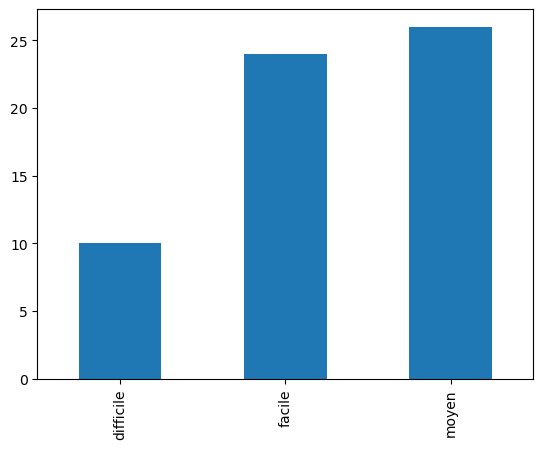

In [150]:
df_rando["difficulte"].value_counts().sort_index().plot.bar()

Affichez le diagramme sous forme de camembert à l'aide de la commande *plot.pie()*.

<AxesSubplot: ylabel='difficulte'>

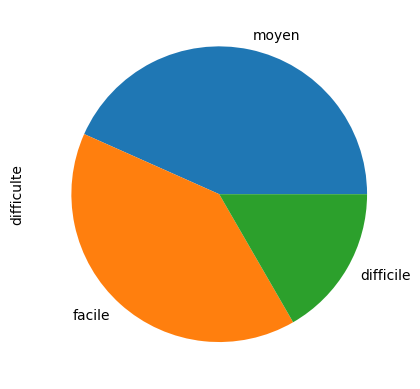

In [113]:
df_rando["difficulte"].value_counts().plot.pie()

Ajoutez l'option *figsize=(6,6)* en paramètre de la fonction *pie()* pour changer la taille de votre figure.

La librairie permet bien sûr d'afficher des graphiques pour des variables quantitatives. Pour l'illustration, nous allons afficher un graphique de dispersion (*scatter plot*) entre les variables *longueur* et *temps_parcours* afin de voir s'il existe une corrélation entre les deux (spoiler alert : oui).

Pour commencer, nettoyez la colonne correspondant à la variable *longueur* afin qu'elle contiennent une variable réelle. L'opération est très similaire à celle sur le temps, mais il faudra aussi remplacer la chaîne d'un nombre en français (ex. 12,5) par l'équivalent en anglais (ex. 12.5). Pour cela, vous pouvez utiliser la fonction *replace* des chaînes de caractères :

ma_chaine = "12,5"

ma_chaine.replace(",", ".")

In [183]:
long = df_rando["longueur"]

df_rando["longueur"] = [float(ch.replace(",",".")[0:-3]) for ch in long]
#ch[0:4]
#ma_chaine = "12,5"
#float(ma_chaine.replace(",","."))

In [184]:
df_rando.head()

,ydepart,nom,descriptif,depart,cheminement_retour,difficulte,cheminement_aller,longueur,temps_parcours,commune_depart,code_insee,denivele,gid,vocation,identifiant,xdepart,observation
0,45.832567,Fort de Vancia,Traversez le vallon duRavinet rejoingnez le fo...,Sathonay-Village-Le Bourg,None,moyen,l'Eglise > la Villotière > le Ravin > Paul Che...,11.4,185,Sathonay-Village,69293,66 m,1,None,357,4.878952,None
1,45.806121,Boucle du Bois de la Lune,C'est un parcours à l'ombre bien appréciable p...,Parking du Lac,None,moyen,Le Lac > L'Hippodrome > Bois de la Lune > Les ...,9.7,150,La Tour-de-Salvagny,69250,94 m,2,pédestre-équestre,492,4.720176,None
2,45.784920,À la découverte du Parc de Lacroix-Laval,None,Belle Etoile,None,facile,Les Cinq Vallons > Les Varennes > Barilly > Cl...,5.0,140,Marcy-l'Étoile,69127,28 m,3,pédestre,500,4.717710,None
3,45.774629,Ruisseau des Planches,Cette promenade parcours les vallons boisés de...,Écully - Village,None,difficile,Le Calabert > Chemin des Rivières > Fontville ...,11.1,170,Écully,69081,167 m,4,pédestre-VTT,510,4.778837,None
4,45.810110,Tour de Saint-Didier,"En partant du bourg, on rejoint par le chemin ...",Le Bourg,None,difficile,Les Barres > Les Primevères > En Arche > Senti...,11.2,180,Saint-Didier-au-Mont-d'Or,69194,332 m,30,None,609,4.798420,None


In [145]:
# petite digression :

# attention, comme pour les listes les dataframes sont mutables et doivent être copiées
# si vous voulez avoir deux objets différents

df_2 = df_rando.copy()
df_2.loc[0,"nom"] = "Superbe balade sur les quais"

In [147]:
df_2.head()

,ydepart,nom,descriptif,depart,cheminement_retour,difficulte,cheminement_aller,longueur,temps_parcours,commune_depart,code_insee,denivele,gid,vocation,identifiant,xdepart,observation
0,45.832567,Superbe balade sur les quais,Traversez le vallon duRavinet rejoingnez le fo...,Sathonay-Village-Le Bourg,None,moyen,l'Eglise > la Villotière > le Ravin > Paul Che...,"11,4 km",185 min,Sathonay-Village,69293,66 m,1,None,357,4.878952,None
1,45.806121,Boucle du Bois de la Lune,C'est un parcours à l'ombre bien appréciable p...,Parking du Lac,None,moyen,Le Lac > L'Hippodrome > Bois de la Lune > Les ...,"9,7 km",150 min,La Tour-de-Salvagny,69250,94 m,2,pédestre-équestre,492,4.720176,None
2,45.784920,À la découverte du Parc de Lacroix-Laval,None,Belle Etoile,None,facile,Les Cinq Vallons > Les Varennes > Barilly > Cl...,5 km,140 min,Marcy-l'Étoile,69127,28 m,3,pédestre,500,4.717710,None
3,45.774629,Ruisseau des Planches,Cette promenade parcours les vallons boisés de...,Écully - Village,None,difficile,Le Calabert > Chemin des Rivières > Fontville ...,"11,1 km",170 min,Écully,69081,167 m,4,pédestre-VTT,510,4.778837,None
4,45.810110,Tour de Saint-Didier,"En partant du bourg, on rejoint par le chemin ...",Le Bourg,None,difficile,Les Barres > Les Primevères > En Arche > Senti...,"11,2 km",180 min,Saint-Didier-au-Mont-d'Or,69194,332 m,30,None,609,4.798420,None


A présent, vous pouvez croiser les deux variables avec la commande scatter :
    
df.plot.scatter(x = nom_var_1, y = nom_var_2)

<AxesSubplot: xlabel='longueur', ylabel='temps_parcours'>

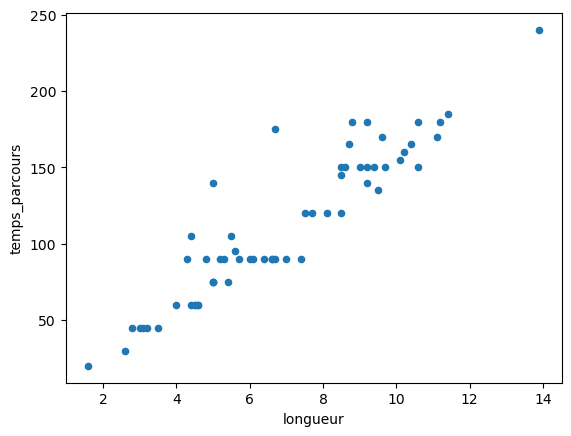

In [186]:
df_rando.plot.scatter(x="longueur", y="temps_parcours")

La commande *scatter* retourne un objet qui permet de modifier les caractéristiques du graphique, comme son titre, ses axes, etc.

ax = df.plot.scatter(x = nom_var_1, y = nom_var_2)

ax.set_title("...")

ax.set_xlabel(...")

(etc.)

Améliorez la lisibilité de votre figure en lui donnant un titre et en précisant les unités des deux axes.

Il est bien sûr possible d'afficher plusieurs séries, avec chacune son label et sa couleur, voire d'attribuer des formes ou des gradients de couleur aux points. Pandas reposant sur Matplotlib, les possibilités sont nombreuses.

Pour plus de visualisations avec Pandas :
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

La page suivante donne une galerie assez exhaustive des possibilités :

https://matplotlib.org/gallery/index.html

## Quatrième partie : analyse de données Velib

L'objectif de cette dernière partie est de charger des données depuis Excel et de faire quelques analyses en utilisant notamment la librairie *numpy*.

La première étape consiste à charger les données Velib qui ont été rassemblés et utilisés la première fois dans le travail suivant :

C. Bouveyron, E. Côme and J. Jacques, The discriminative functional mixture model for the analysis of bike sharing systems, Preprint HAL n.01024186, University Paris Descartes, 2014.

Pour cela, utilisez la fonction *read_excel* de pandas sur le fichier qui vous est fourni afin de créer 4 variables de type DataFrame.

Il faut préciser en paramètre le nom du feuillet grâce à l'argument *sheet_name*.

Si le tableau ne comporte pas de titres aux colonnes, il faut préciser l'argument *header=None*.

In [193]:
util = pd.read_excel("datasets/velib.xlsx", sheet_name="util", header=None)
noms = pd.read_excel("datasets/velib.xlsx", sheet_name="noms", header=None)
dates = pd.read_excel("datasets/velib.xlsx", sheet_name="dates", header=None)
hills = pd.read_excel("datasets/velib.xlsx", sheet_name="hills", header=None)

Vérifiez la taille de chacun de vos variables grâce à l'attribut *shape*, ainsi que le début de chacun des tableaux.

In [194]:
print(util.shape)
print(noms.shape)
print(dates.shape)
print(hills.shape)

(1190, 182)
(1189, 2)
(181, 2)
(1189, 2)


Créez deux dictionnaires *nom2id* et *id2nom* afin de créer une correspondance entre l'identifiant de la station (faîtes-la commencer à 0) et son nom. Vous pouvez utiliser la fonction *strip()* qui permet d'éliminer les espaces en début et fin de chaîne.

In [207]:
noms_clean = [n.strip() for n in noms[1]]
print(f"Nom de la station au début : \"{noms[1][0]}\" et après nettoyage : \"{noms_clean[0]}\"")

identifiants = noms[0]

# je veux associer noms_clean[0] à identifiants[0], et ainsi de suite

k=0
for (n, i) in zip(noms_clean,identifiants):
    print(f"Le nom {n} est associé à {i}")
    k += 1
    if k>10:
        break

nom2id = {}
id2nom = {}
for (n, i) in zip(noms_clean,identifiants):
    nom2id[n] = i
    id2nom[i] = n
    
# alternative avec la fonction dict()
#nom2id = dict(zip(noms_clean,identifiants))
#id2nom = dict(zip(identifiants,noms_clean))

Nom de la station au début : " EURYALE DEHAYNIN" et après nettoyage : "EURYALE DEHAYNIN"
Le nom EURYALE DEHAYNIN est associé à 1
Le nom LEMERCIER est associé à 2
Le nom MEZIERES RENNES est associé à 3
Le nom FARMAN est associé à 4
Le nom QUAI DE LA RAPEE est associé à 5
Le nom CHOISY POINT D'IVRY est associé à 6
Le nom PORTE DE VILLIERS est associé à 7
Le nom STALINGRAD (FONTENAY SOUS BOIS) est associé à 8
Le nom GARE RER (JOINVILLE) est associé à 9
Le nom MOUFFETARD EPEE DE BOIS est associé à 10
Le nom PELLEPORT est associé à 11


Testez vos dictionnaires.

In [208]:
nom2id["PELLEPORT"]
#id2nom[11]

11

En utilisant la librairie *numpy*, créez un tableau *numpy.array* qui regroupe la charge d'utilisation des stations au fil du temps. Attention à ne pas conserver les intitulés des lignes et colonnes. Vérifiez la dimension du tableau qui devrait être de 1189 lignes les stations) et 181 colonnes (dates).

In [4]:
import numpy as np


Calculez la charge totale des stations à l'aide de la fonction *sum* appliquée au tableau. Le paramètre *axis* permet de préciser si la somme est réalisée par ligne (1) ou par colonne (0).

Affichez ensuite la charge de la station EVANGILE.

On pourra remarquer que ces opérations auraient pu être réalisées directement avec *pandas*, mais l'objectif consistait ici à s'entraîner à utiliser *numpy*.

Créez un tableau DataFrame comportant les informations : nom de la station, installation sur une colline (ou pas), charge totale de la station. Pour cela, vous pouvez instancier ce type d'objet à l'aide d'un dictionnaire ainsi :

*pandas.DataFrame({"nom colonne 1" : liste de valeurs, "nom colonne 2" : liste de valeurs, etc.})*

Vérifiez que le tableau a bien été construit.

A présent, utilisez la fonction *groupby* de pandas pour calculer des statistiques sur l'utilisation des stations en fonction de leur positionnement (ou non) sur une colline.

D'autres exercices sont intéressants avec ces données :

- afficher les courbes de charges de certaines stations (utilisation de matplotlib)
- classification non supervisée (*clustering*) pour regrouper les stations présentant le même profil